# Analysis of Discharge characteristics
proof of concept for later analysis  
inspiration taken from Thirza BEP

In [174]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from ewatercycle.observation.grdc import get_grdc_data

import scipy.stats as stats
import math
from scipy.optimize import curve_fit, fsolve

In [175]:
grdc_chatly = get_grdc_data(2817100,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/')

grdc_kerki = get_grdc_data(2617110,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/')





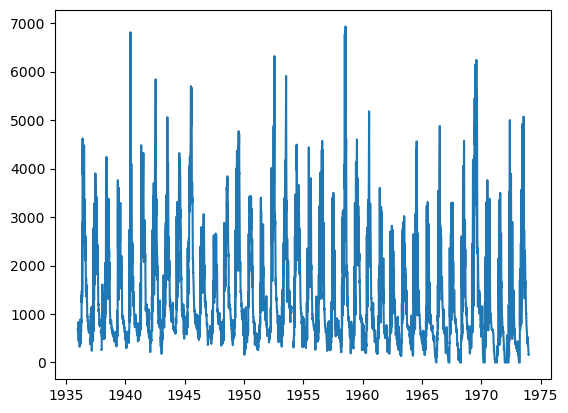

In [176]:
plt.plot(grdc_chatly['time'], grdc_chatly['streamflow'], label='Chatly')

In [177]:
# annual maxima
# Find the maximum annual discharge
max_discharge = grdc_chatly['streamflow'].groupby("time.year").max()

print(max_discharge.values)

[4620. 3900. 4240. 3760. 6810. 4480. 5840. 5060. 4320. 5700. 3060. 2660.
 3840. 4770. 3430. 3400. 6320. 5910. 4490. 4440. 4570. 3500. 6930. 4600.
 5180. 3600. 2820. 3020. 4560. 3310. 4880. 3300. 4570. 6240. 3760. 3500.
 5000. 5070.]


/tmp/ipykernel_314079/1919414653.py:38: RuntimeWarning: divide by zero encountered in log
  x_fit = np.logspace(np.log(min(sorted_data)), np.log10(max(return_periods_years_subset))*2.5, 50)
/opt/conda/envs/ewatercycle2/lib/python3.12/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/conda/envs/ewatercycle2/lib/python3.12/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


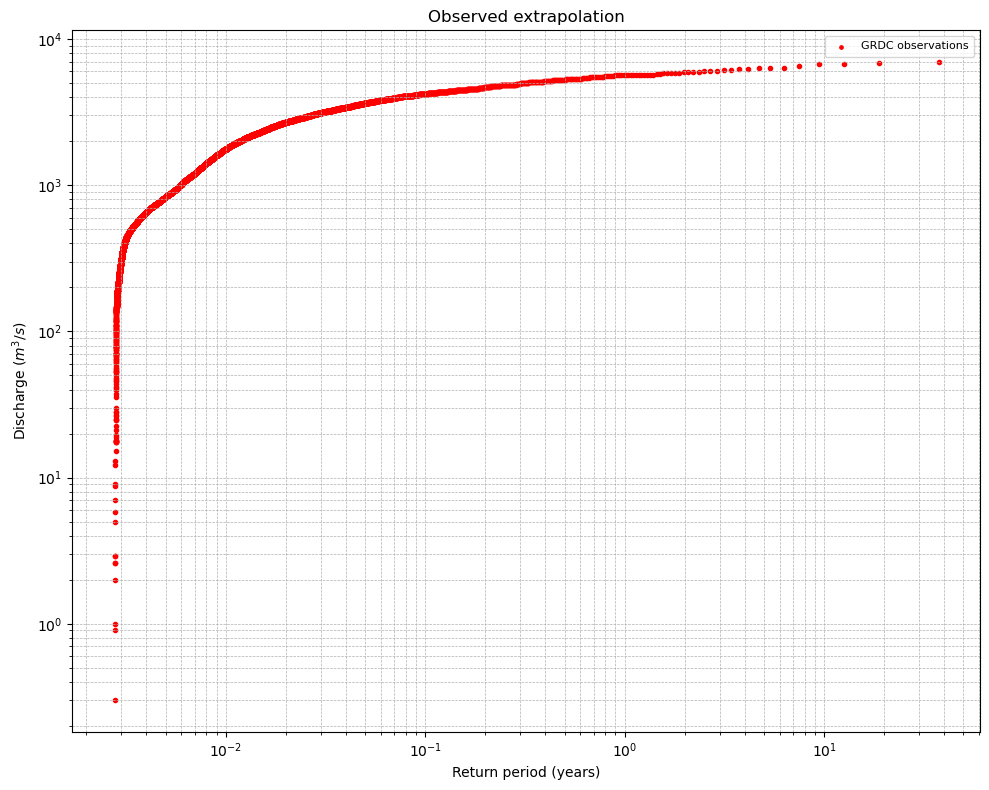

In [178]:

plt.figure(figsize=(10, 8))

# all discharge data
discharge = grdc_chatly['streamflow'].values
cleaned_discharge = [x for x in discharge if not math.isnan(x)]
data = cleaned_discharge





sorted_data_scatter = np.sort(data)[::-1]
sorted_data = np.sort(data)[::-1]# Sorteer aflopend
n = len(sorted_data)
rank = np.arange(1, n + 1)
return_periods_days = (n + 1) / rank
return_periods_years_scatter = return_periods_days / 365.25


def power_law(x, a, b):
    return a * x ** b

def calculate_return_periods(sorted_data):
    n = len(sorted_data)
    rank = np.arange(1, n + 1)
    return_periods_days = (n + 1) / rank
    return_periods_years = return_periods_days / 365.25


    return_periods_years_subset = return_periods_years[return_periods_years >= 0]
    sorted_data_subset = sorted_data[return_periods_years >= 0]

    # Fit the power law function
    params, _ = curve_fit(power_law, return_periods_years_subset, sorted_data_subset, maxfev=10000)
    a_opt, b_opt = params

    # Make fit for return period
    x_fit = np.logspace(np.log(min(sorted_data)), np.log10(max(return_periods_years_subset))*2.5, 50)
    y_fit = power_law(x_fit, a_opt, b_opt)

    return x_fit, y_fit, a_opt, b_opt

x_fit, y_fit, a_opt, b_opt = calculate_return_periods(sorted_data)

# def find_x_for_y(y_target, a, b):
#     return (y_target / a) ** (1 / b)
# y_target = 530
# x_value = find_x_for_y(y_target, a_opt, b_opt)
# # print(f"For a mean threshold value of {y_target} m3/s, the return period is {x_value:.3f} years for fit all data")

# plt.hlines(y_target, xmin=0, xmax=x_value, colors='g', linestyles='dashed')
# plt.vlines(x_value, ymin=0, ymax=y_target, colors='g', linestyles='dashed')
# plt.text(x_value, 0.2, f'{x_value:.0f} years', ha='center', fontsize=12, color='black')  
# plt.text(0.002, y_target, f'{y_target:.0f} $m^3/s$', va='top', fontsize=12, color='black')

# def find_x_for_y(y_target, a, b):
#     return (y_target / a) ** (1 / b)
# y_target = 510
# x_value = find_x_for_y(y_target, a_opt, b_opt)
# # print(f"For a mean threshold value of {y_target} m3/s, the return period is {x_value:.3f} years for fit all data")

# def find_x_for_y(y_target, a, b):
#     return (y_target / a) ** (1 / b)
# y_target = 511
# x_value = find_x_for_y(y_target, a_opt, b_opt)
# # print(f"For a mean threshold value of {y_target} m3/s, the return period is {x_value:.3f} years for fit all data")

# def find_x_for_y(y_target, a, b):
#     return (y_target / a) ** (1 / b)
# y_target = 550
# x_value = find_x_for_y(y_target, a_opt, b_opt)
# # print(f"For a mean threshold value of {y_target} m3/s, the return period is {x_value:.3f} years for fit all data")

# def find_x_for_y(y_target, a, b):
#     return (y_target / a) ** (1 / b)
# y_target = 557
# x_value = find_x_for_y(y_target, a_opt, b_opt)
# # print(f"For a mean threshold value of {y_target} m3/s, the return period is {x_value:.3f} years for fit all data")

# y_target = 534
# x_value = find_x_for_y(y_target, a_opt, b_opt)
# # print(f"For a mean threshold value of {y_target} m3/s, the return period is {x_value:.3f} years for fit all data")
# plt.plot(x_fit, y_fit, label=f'Fit all data', color='blue')

# sorted_data_list = [
#     np.delete(sorted_data, 0),           
#     np.delete(sorted_data, 1),           
#     np.delete(sorted_data, [0, 1]),      
#     np.delete(sorted_data, slice(0, 5)), 
#     sorted_data[sorted_data >= 0.5]
# ]

# for i, sorted_data in enumerate(sorted_data_list):
#     x_fit_less, y_fit_less, a_opt, b_opt = calculate_return_periods(sorted_data)
#     plt.plot(x_fit_less, y_fit_less, label=f'Fit {i + 1}')

#plt.ylim(0.05, 100000)  # Kies een passend bereik
#plt.xlim(0.001, 8000)
plt.yscale('log')
plt.xscale('log')
plt.scatter(return_periods_years_scatter, sorted_data_scatter, color="red", marker='.', label = 'GRDC observations')
plt.xlabel('Return period (years)')
plt.ylabel('Discharge ($m^3/s$)')


plt.title('Observed extrapolation')
plt.legend(fontsize=8, markerscale=0.8, frameon=True, borderpad=0.5)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.text(0.5, -0.4, "Figure 5: Observation Extrapolation. The observed data and corresponding return periods are plotted as red dots. \n They are fitted and extrapolated using the power law function. \n"
#          "The different fits represent datasets without certain datapoints, to show the influence of certain discharges on returnperiod calculations.", 
#          ha="center", fontsize=9, transform=plt.gca().transAxes)
plt.tight_layout()
# plt.savefig("/home/thirza/BEPproject/book/EINDRAPPORT/scatterobs3.png", dpi=300)
plt.show();


In [179]:
sorted_data_list = [
    np.delete(sorted_data, 0),           
    np.delete(sorted_data, 1),           
    np.delete(sorted_data, [0, 1]),      
    np.delete(sorted_data, slice(0, 5)), 
    sorted_data[sorted_data >= 0.5]
]

In [180]:
print(np.median(sorted_data))

910.0


In [181]:
sorted_data_list


[array([6810., 6770., 6720., ...,    0.,    0.,    0.]),
 array([6930., 6770., 6720., ...,    0.,    0.,    0.]),
 array([6770., 6720., 6500., ...,    0.,    0.,    0.]),
 array([6370., 6370., 6320., ...,    0.,    0.,    0.]),
 array([6.93e+03, 6.81e+03, 6.77e+03, ..., 2.00e+00, 1.00e+00, 9.00e-01])]

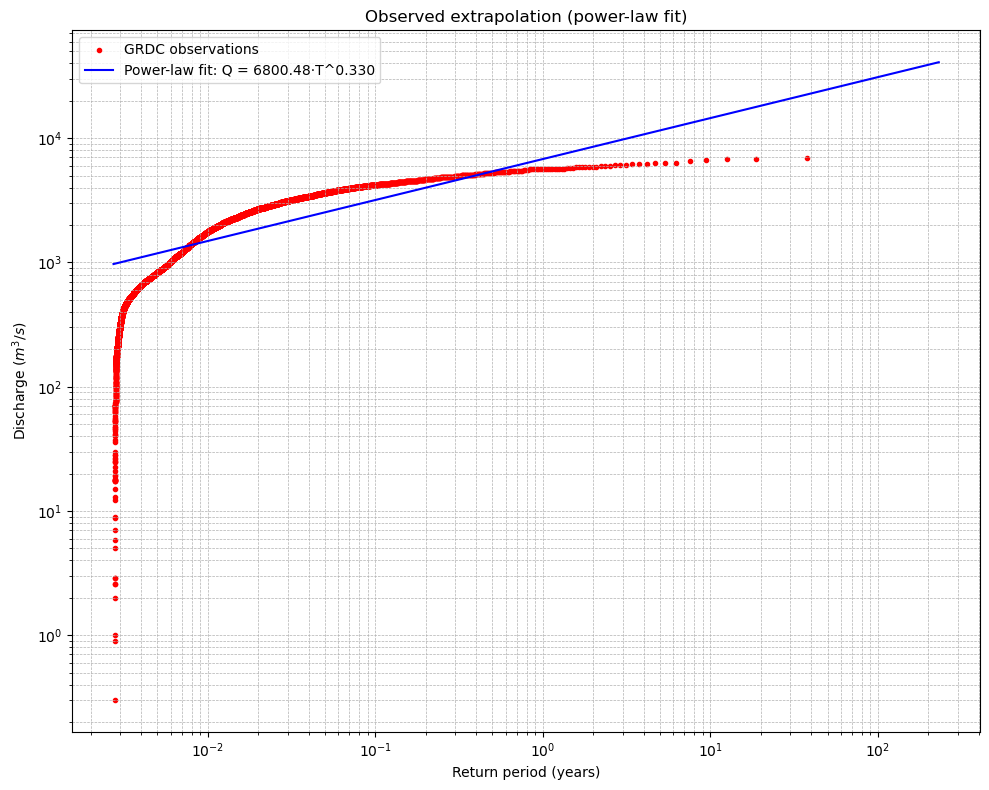

Fitted parameters:
  a = 6800.480
  b = 0.330


In [182]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

plt.figure(figsize=(10, 8))

# All discharge data
discharge = grdc_chatly['streamflow'].values
data = [x for x in discharge if not math.isnan(x)]

# Sort data from high to low
sorted_data = np.sort(data)[::-1]
n = len(sorted_data)
rank = np.arange(1, n + 1)
return_periods_days = (n + 1) / rank
return_periods_years = return_periods_days / 365.25  # only valid if data are daily

# Power-law function
def power_law(x, a, b):
    return a * x ** b

def calculate_return_periods(sorted_data):
    n = len(sorted_data)
    rank = np.arange(1, n + 1)
    return_periods_days = (n + 1) / rank
    return_periods_years = return_periods_days / 365.25  # adjust if not daily data

    # Fit the power law
    params, _ = curve_fit(power_law, return_periods_years, sorted_data, maxfev=10000)
    a_opt, b_opt = params

    # Generate smooth curve for fit (in years)
    x_fit = np.logspace(np.log10(min(return_periods_years)),
                        np.log10(max(return_periods_years)) * 1.5, 100)
    y_fit = power_law(x_fit, a_opt, b_opt)

    return x_fit, y_fit, a_opt, b_opt, return_periods_years

# Run fit
x_fit, y_fit, a_opt, b_opt, return_periods_years = calculate_return_periods(sorted_data)

# Plot data + fit
plt.scatter(return_periods_years, sorted_data, color='red', label='GRDC observations', marker='.')
plt.plot(x_fit, y_fit, color='blue', label=f'Power-law fit: Q = {a_opt:.2f}·T^{b_opt:.3f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Return period (years)')
plt.ylabel('Discharge ($m^3/s$)')
plt.title('Observed extrapolation (power-law fit)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

print(f"Fitted parameters:\n  a = {a_opt:.3f}\n  b = {b_opt:.3f}")


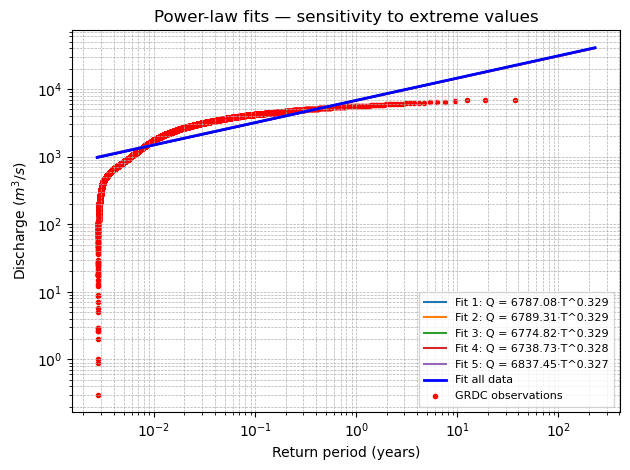

In [183]:

for i, subset in enumerate(sorted_data_list):
    x_fit_less, y_fit_less, a_opt, b_opt, _ = calculate_return_periods(subset)
    plt.plot(x_fit_less, y_fit_less, label=f'Fit {i + 1}: Q = {a_opt:.2f}·T^{b_opt:.3f}')

# Plot original fit
plt.plot(x_fit, y_fit, color='blue', linewidth=2, label='Fit all data')

# Overlay observed data
plt.scatter(return_periods_years, sorted_data, color='red', marker='.', label='GRDC observations')

# Axes and labels
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Return period (years)')
plt.ylabel('Discharge ($m^3/s$)')
plt.title('Power-law fits — sensitivity to extreme values')
plt.legend(fontsize=8, frameon=True, borderpad=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


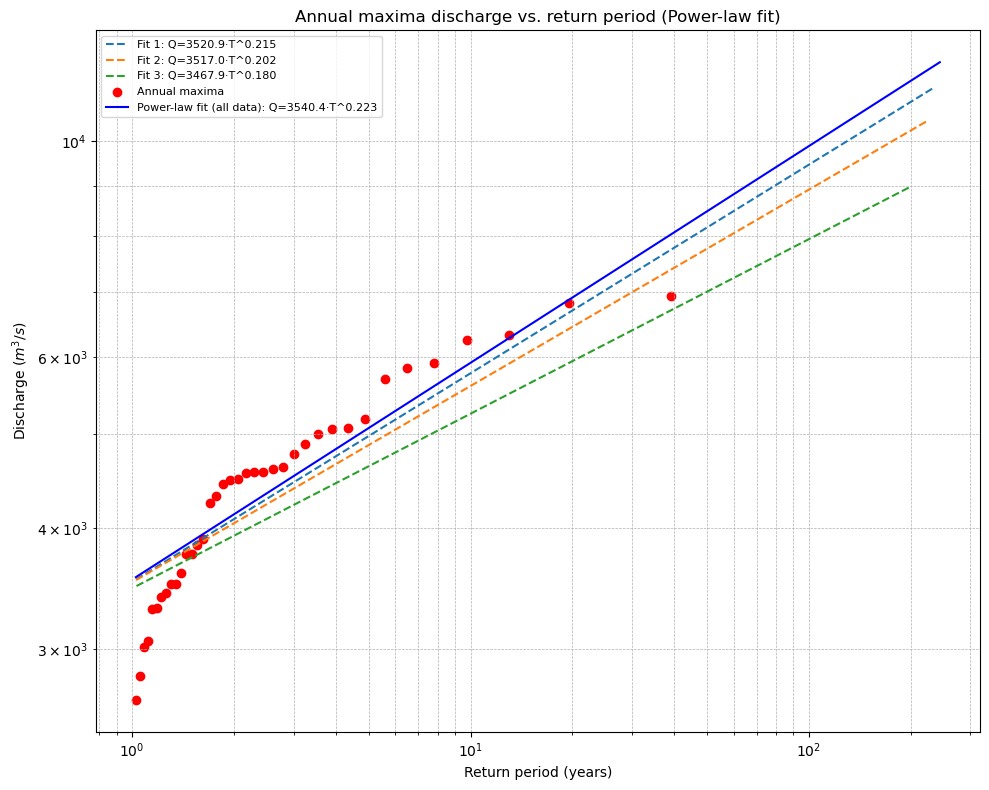

   Return period (years)  Discharge (m³/s)
0                      2           4132.41
1                      5           5069.51
2                     10           5917.14
3                     25           7258.96
4                     50           8472.68
5                    100           9889.33


In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

# === 1. Select annual maxima ===
# Assuming `grdc_chatly` has a datetime index or a column with dates
# df = grdc_chatly.copy()
# df['time'] = pd.to_datetime(df['time'])
# df = df.set_index('time')

# Extract annual maximum discharge (1 per year)
#annual_maxima = df['streamflow'].resample('Y').max().dropna()
annual_maxima = max_discharge = grdc_chatly['streamflow'].groupby("time.year").max()
# === 2. Prepare data ===
data = annual_maxima.values
sorted_data = np.sort(data)[::-1]  # sort descending
n = len(sorted_data)
rank = np.arange(1, n + 1)
return_periods_years = (n + 1) / rank  # Weibull plotting position

# === 3. Power-law fit ===
def power_law(x, a, b):
    return a * x ** b

def calculate_return_periods(sorted_data):
    n = len(sorted_data)
    rank = np.arange(1, n + 1)
    T_years = (n + 1) / rank
    params, _ = curve_fit(power_law, T_years, sorted_data, maxfev=10000)
    a_opt, b_opt = params
    x_fit = np.logspace(np.log10(min(T_years)), np.log10(max(T_years)) * 1.5, 100)
    y_fit = power_law(x_fit, a_opt, b_opt)
    return x_fit, y_fit, a_opt, b_opt, T_years

x_fit, y_fit, a_opt, b_opt, T_years = calculate_return_periods(sorted_data)



# === 4. Sensitivity test (optional) ===
plt.figure(figsize=(10, 8))
sorted_data_list = [
    np.delete(sorted_data, 0),             # remove largest value
    np.delete(sorted_data, [0, 1]),        # remove two largest
    np.delete(sorted_data, slice(0, 5)),   # remove top 5
]

for i, subset in enumerate(sorted_data_list):
    x_fit_less, y_fit_less, a_opt_sub, b_opt_sub, _ = calculate_return_periods(subset)
    plt.plot(x_fit_less, y_fit_less, linestyle='--', label=f'Fit {i+1}: Q={a_opt_sub:.1f}·T^{b_opt_sub:.3f}')

# === 5. Plot ===

plt.scatter(return_periods_years, sorted_data, color='red', label='Annual maxima')
plt.plot(x_fit, y_fit, color='blue', label=f'Power-law fit (all data): Q={a_opt:.1f}·T^{b_opt:.3f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Return period (years)')
plt.ylabel('Discharge ($m^3/s$)')
plt.title('Annual maxima discharge vs. return period (Power-law fit)')
plt.legend(fontsize=8, frameon=True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# === 6. Summary table ===
T_target = np.array([2, 5, 10, 25, 50, 100])
Q_target = power_law(T_target, a_opt, b_opt)
summary = pd.DataFrame({'Return period (years)': T_target, 'Discharge (m³/s)': Q_target.round(2)})
print(summary)


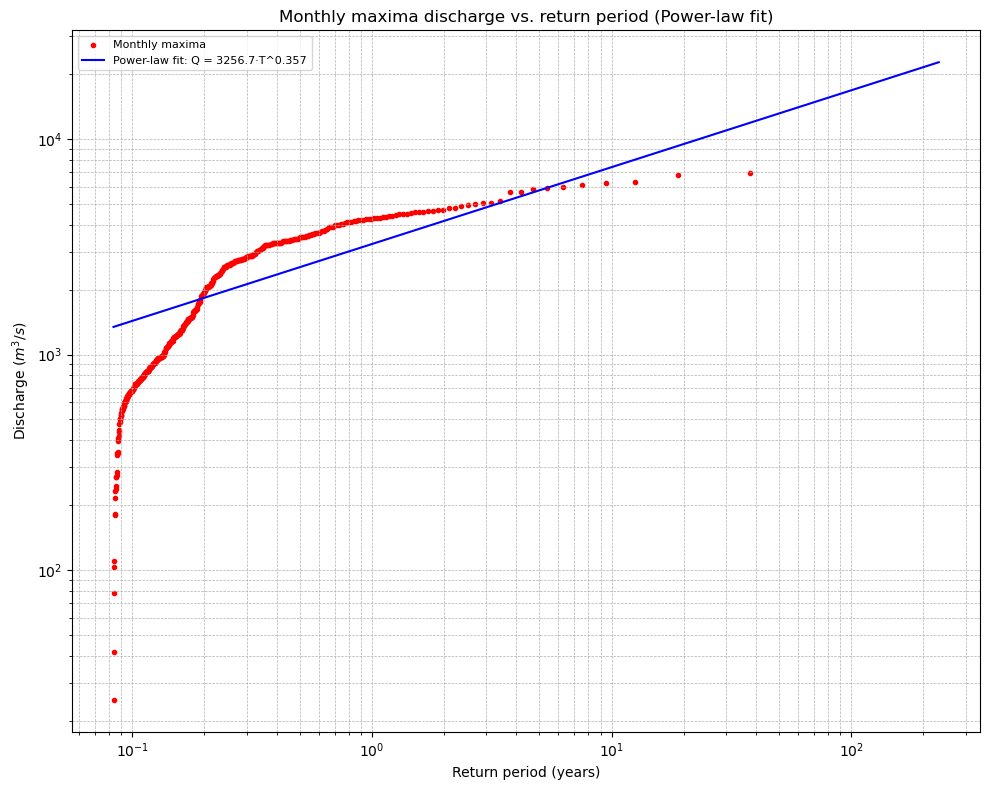

   Return period (years)  Discharge (m³/s)
0                      2           4170.00
1                      5           5781.69
2                     10           7403.08
3                     25          10264.34
4                     50          13142.81
5                    100          16828.51


In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# === 1. Compute monthly maxima ===

monthly_maxima = grdc_chatly['streamflow'].resample(time="ME").max(skipna=True)
# === 2. Prepare data ===
data = monthly_maxima.values
data = data[~np.isnan(data)]           # remove NaN values
data = data[data > 0] 
sorted_data = np.sort(data)[::-1]  # descending
n = len(sorted_data)
rank = np.arange(1, n + 1)

# Return period in months, then convert to years
T_months = (n + 1) / rank
T_years = T_months / 12.0

# === 3. Define power-law fit ===
def power_law(x, a, b):
    return a * x ** b

def calculate_return_periods(sorted_data):
    n = len(sorted_data)
    rank = np.arange(1, n + 1)
    T_months = (n + 1) / rank
    T_years = T_months / 12.0

    params, _ = curve_fit(power_law, T_years, sorted_data, maxfev=10000)
    a_opt, b_opt = params

    x_fit = np.logspace(np.log10(min(T_years)), np.log10(max(T_years)) * 1.5, 100)
    y_fit = power_law(x_fit, a_opt, b_opt)
    return x_fit, y_fit, a_opt, b_opt, T_years

x_fit, y_fit, a_opt, b_opt, T_years = calculate_return_periods(sorted_data)

# === 4. Plot ===
plt.figure(figsize=(10, 8))
plt.scatter(T_years, sorted_data, color='red', label='Monthly maxima', marker='.')
plt.plot(x_fit, y_fit, color='blue', label=f'Power-law fit: Q = {a_opt:.1f}·T^{b_opt:.3f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Return period (years)')
plt.ylabel('Discharge ($m^3/s$)')
plt.title('Monthly maxima discharge vs. return period (Power-law fit)')
plt.legend(fontsize=8, frameon=True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# === 5. Summary table ===
T_target = np.array([2, 5, 10, 25, 50, 100])
Q_target = power_law(T_target, a_opt, b_opt)
summary = pd.DataFrame({'Return period (years)': T_target, 'Discharge (m³/s)': Q_target.round(2)})
print(summary)


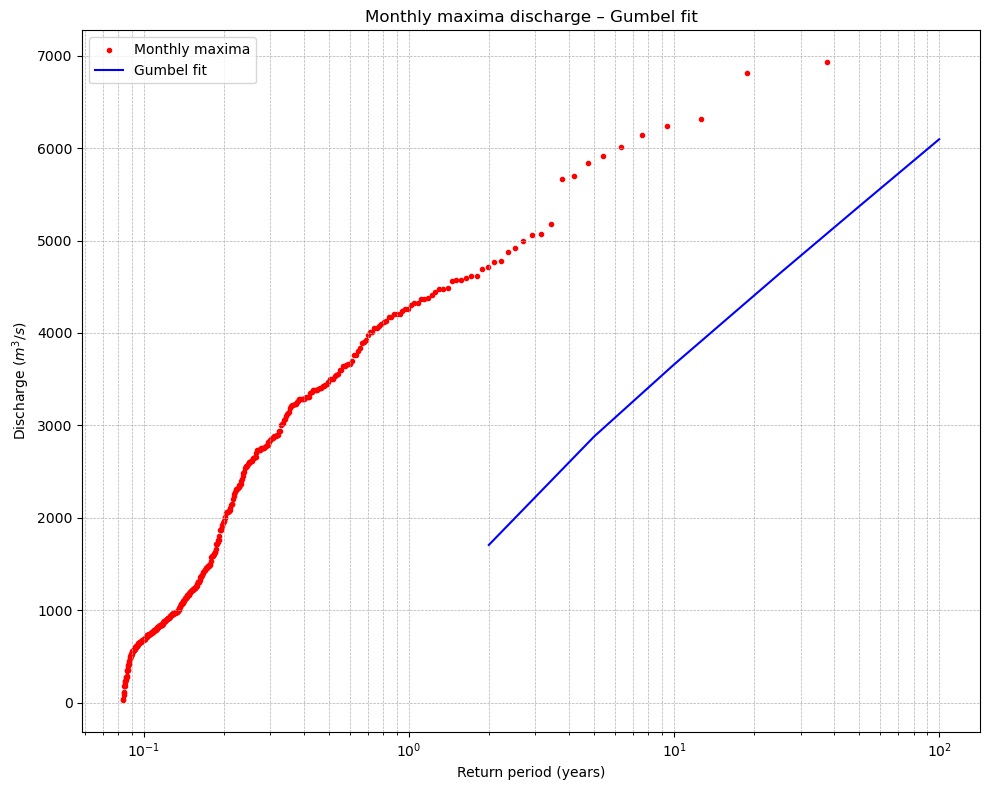

   Return period (years)  Discharge (m³/s)
0                      2            1705.2
1                      5            2880.8
2                     10            3659.2
3                     25            4642.7
4                     50            5372.3
5                    100            6096.5

Gumbel parameters: location = 1325.07, scale = 1037.23


In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

monthly_maxima = grdc_chatly['streamflow'].resample(time="ME").max(skipna=True)
# === 2. Prepare data ===
data = monthly_maxima.values
data = data[~np.isnan(data)]
data = data[data > 0]

# === 2. Fit Gumbel distribution ===
loc, scale = gumbel_r.fit(data)
n = len(data)
rank = np.arange(1, n + 1)
sorted_data = np.sort(data)[::-1]

# Return period (monthly → yearly)
T_months = (n + 1) / rank
T_years = T_months / 12.0

# === 3. Compute theoretical quantiles ===
def gumbel_quantile(T, loc, scale):
    """Return quantile for return period T (years)"""
    p = 1 - 1 / T
    return gumbel_r.ppf(p, loc=loc, scale=scale)

T_target = np.array([2, 5, 10, 25, 50, 100])
Q_target = gumbel_quantile(T_target, loc, scale)

# === 4. Plot ===
plt.figure(figsize=(10, 8))
plt.scatter(T_years, sorted_data, color='red', marker='.', label='Monthly maxima')
plt.plot(T_target, Q_target, color='blue', label='Gumbel fit')
plt.xscale('log')
plt.xlabel('Return period (years)')
plt.ylabel('Discharge ($m^3/s$)')
plt.title('Monthly maxima discharge – Gumbel fit')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# === 5. Summary ===
summary = pd.DataFrame({
    'Return period (years)': T_target,
    'Discharge (m³/s)': np.round(Q_target, 1)
})
print(summary)
print(f"\nGumbel parameters: location = {loc:.2f}, scale = {scale:.2f}")


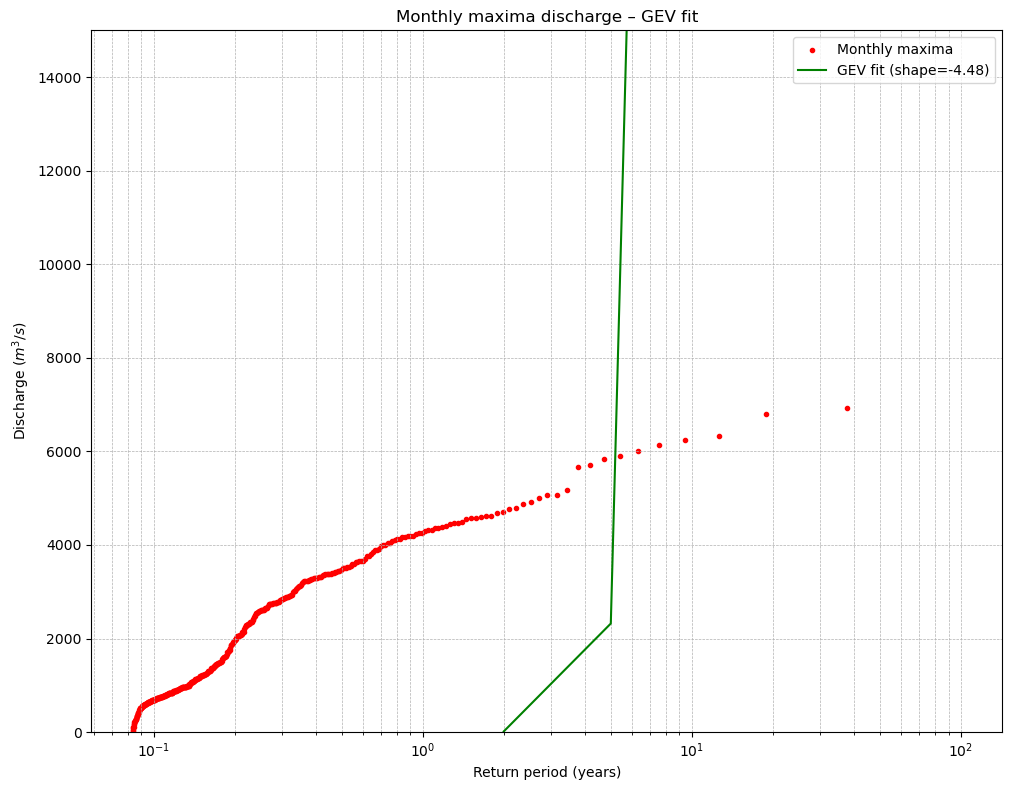

   Return period (years)  Discharge (m³/s)
0                      2      1.470000e+01
1                      5      2.321300e+03
2                     10      6.715560e+04
3                     25      4.716028e+06
4                     50      1.105128e+08
5                    100      2.530079e+09

GEV parameters: shape = -4.484, location = 3.08, scale = 12.48


In [187]:
from scipy.stats import genextreme as gev

# === 1. Fit GEV ===
GEV_data = grdc_chatly['streamflow'].values

GEV_data = grdc_chatly['streamflow'].values
cleaned_GEV_data = [x for x in GEV_data if not math.isnan(x)]
GEV_input = np.array(cleaned_GEV_data)

# Replace zeros
min_nonzero = GEV_input[GEV_input > 0].min()
epsilon = 0.1 * min_nonzero
GEV_input[GEV_input == 0] = 100


shape, loc, scale = gev.fit(GEV_input)

# === 2. Quantiles ===
def gev_quantile(T, shape, loc, scale):
    p = 1 - 1 / T
    return gev.ppf(p, shape, loc=loc, scale=scale)

T_target = np.array([2, 5, 10, 25, 50, 100])
Q_target = gev_quantile(T_target, shape, loc, scale)

# === 3. Plot ===
plt.figure(figsize=(10, 8))
plt.scatter(T_years, sorted_data, color='red', marker='.', label='Monthly maxima')
plt.plot(T_target, Q_target, color='green', label=f'GEV fit (shape={shape:.2f})')
plt.xscale('log')
plt.xlabel('Return period (years)')
plt.ylabel('Discharge ($m^3/s$)')
plt.title('Monthly maxima discharge – GEV fit')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.ylim(0,15000)
plt.show()

# === 4. Summary ===
summary = pd.DataFrame({
    'Return period (years)': T_target,
    'Discharge (m³/s)': np.round(Q_target, 1)
})
print(summary)
print(f"\nGEV parameters: shape = {shape:.3f}, location = {loc:.2f}, scale = {scale:.2f}")


In [188]:
print(np.size(GEV_input))


13728
